<a href="https://colab.research.google.com/github/Creatrohit9/tele_churn-ANALYSIS/blob/main/rohit_bhadauriya_EDA_2Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
!pip install klib #this librari help to visualised the all data

     |████████████████████████████████| 22.3 MB 1.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:

import klib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/MyDrive/Copy of Telecom Churn.csv'
tele_df=pd.read_csv(file_path)

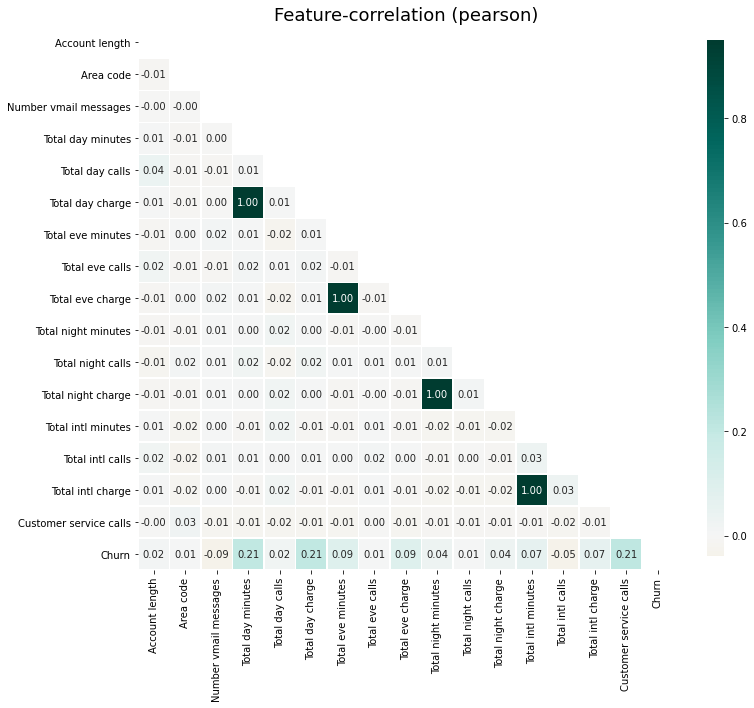

In [ ]:
# for correlation plot 
klib.corr_plot(tele_df)


In [ ]:
#for all missing value
klib.missingval_plot(tele_df)

No missing values found in the dataset.


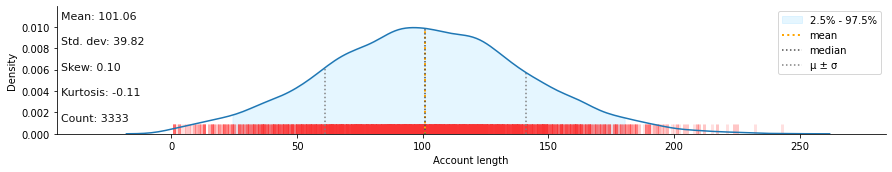

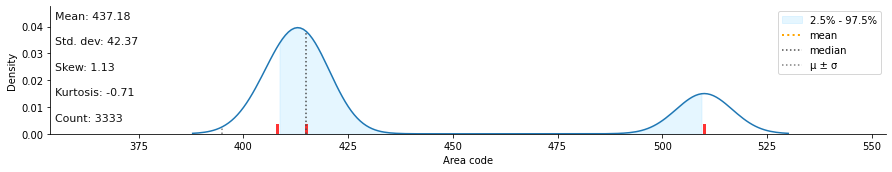

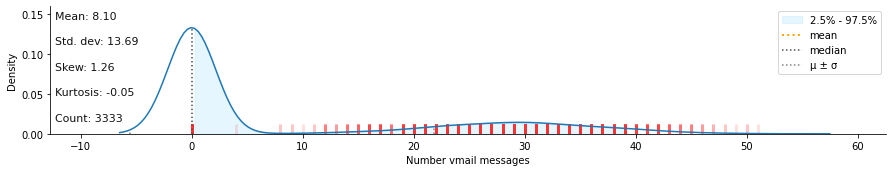

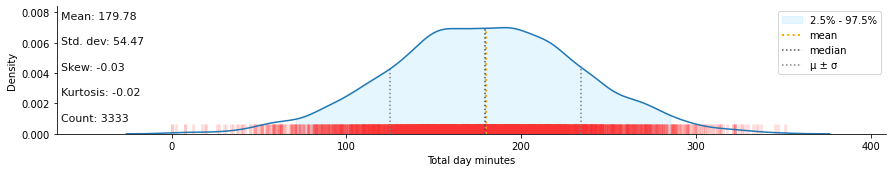

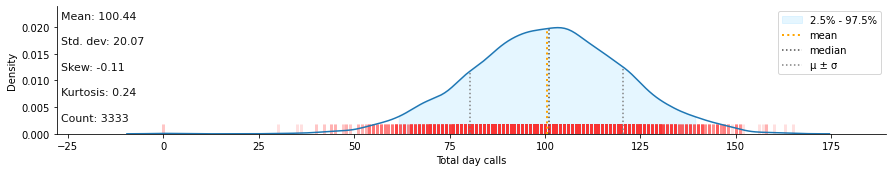

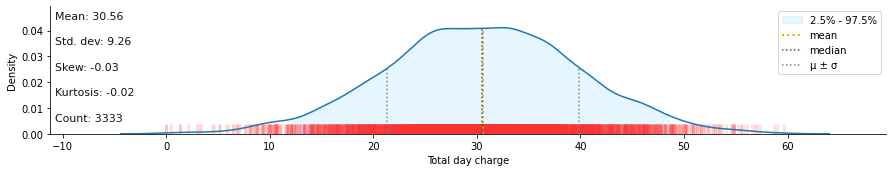

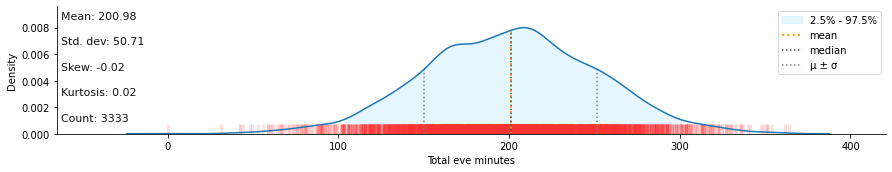

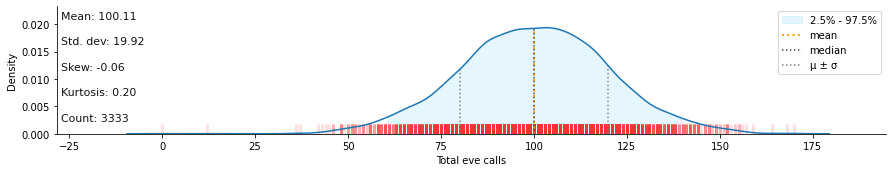

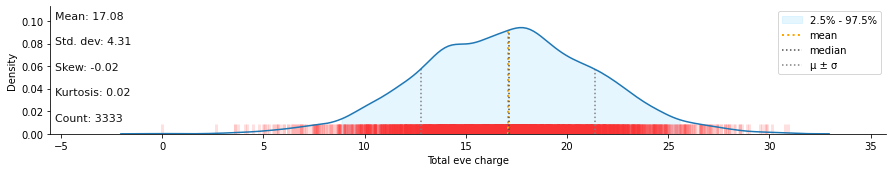

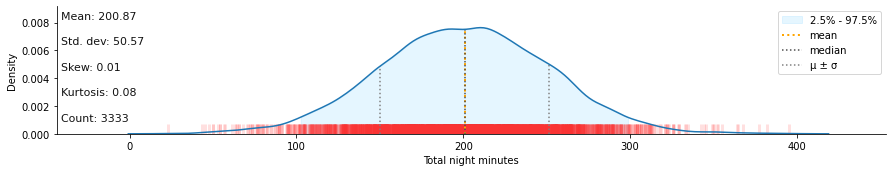

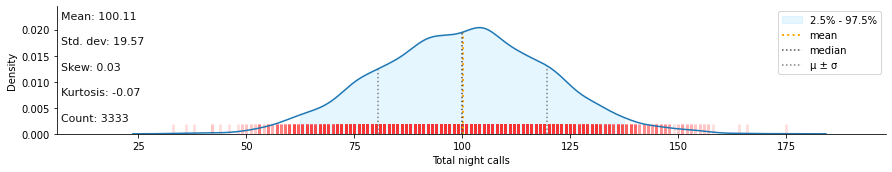

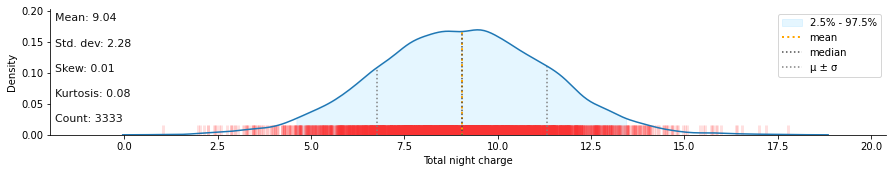

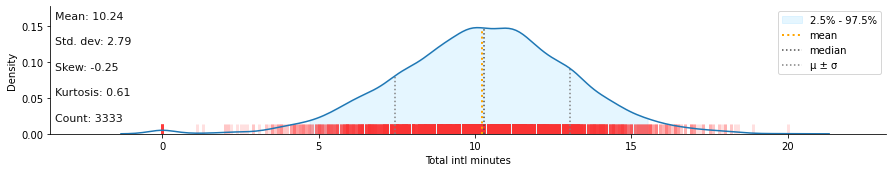

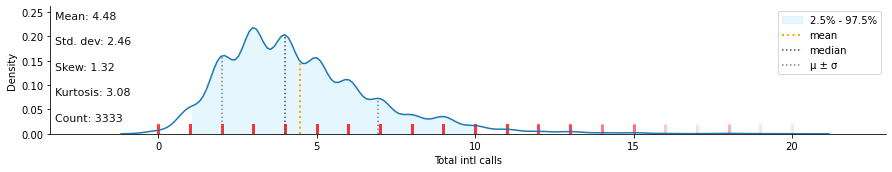

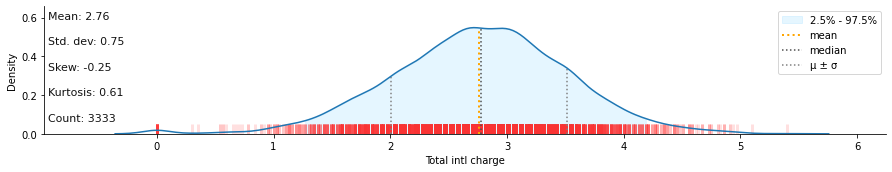

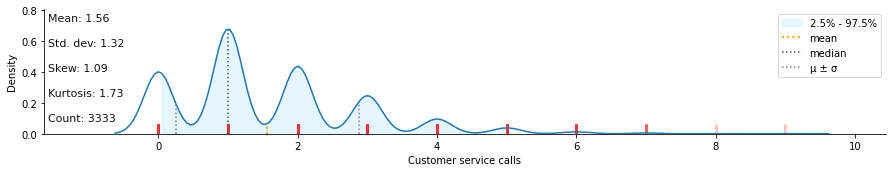

In [ ]:
#plot gives us data distribution
klib.dist_plot(tele_df)

In [ ]:
tele_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
tele_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
tele_df.shape

(3333, 20)

In [ ]:
tele_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:

print("Columns and data types")
pd.DataFrame(tele_df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
State,object
Account length,int64
Area code,int64
International plan,object
Voice mail plan,object
Number vmail messages,int64
Total day minutes,float64
Total day calls,int64
Total day charge,float64
Total eve minutes,float64


In [ ]:
# Checking Duplicate Values
len(tele_df[tele_df.duplicated()])

0

In [ ]:
tele_df.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
tele_df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [ ]:

tele_df['State'].nunique()

51

In [ ]:
tele_df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

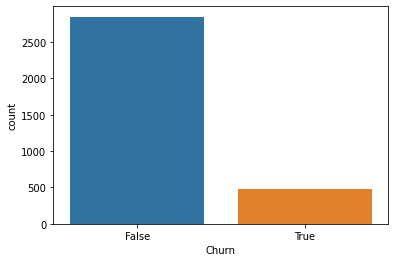

In [ ]:
sns.countplot(x=tele_df.Churn)

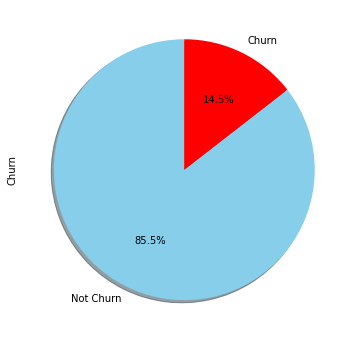

In [ ]:
tele_df['Churn'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn','Churn'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [ ]:
# for unique state
tele_df['State'].nunique()

51

In [ ]:
tele_df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

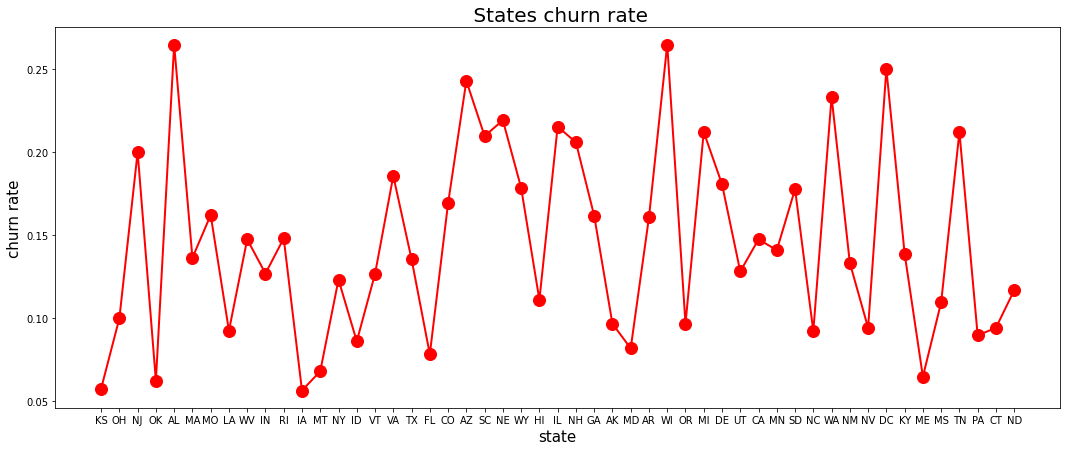

In [ ]:
#line plot for state churn
s1=tele_df['State'].unique()
s2=tele_df.groupby(['State'])['Churn'].mean()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" States churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15)
plt.show()

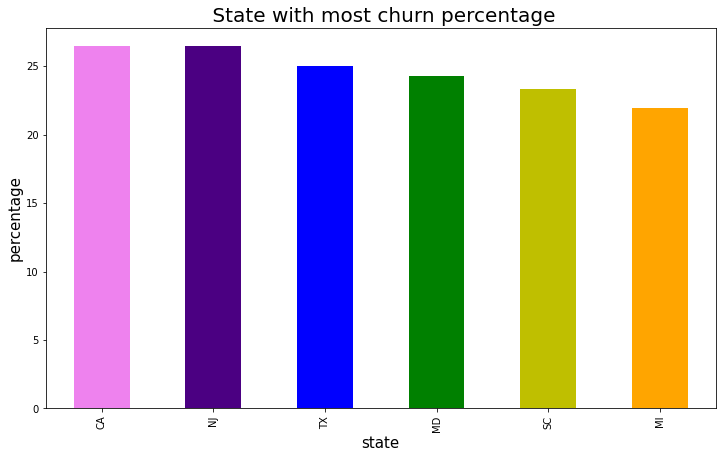

In [ ]:
# plot gives lots for the churn observation
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = (12, 7)

color = plt.cm.copper(np.linspace(0, 0.5, 20))
((tele_df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

<BarContainer object of 51 artists>

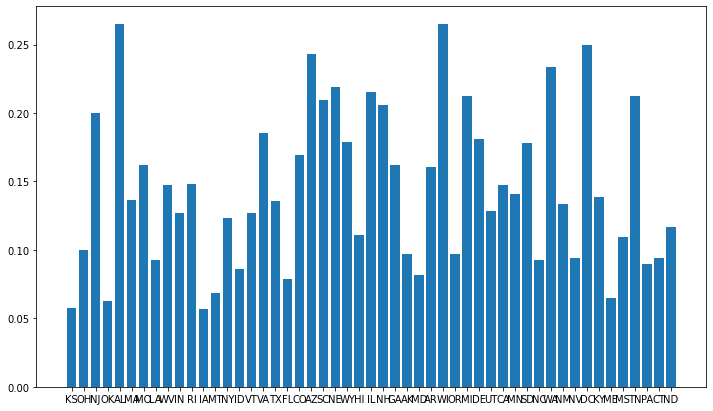

In [ ]:
# BAR FOR STATEWISE CHURN
state_churn=tele_df.groupby(['State'])['Churn'].mean()
plt.rcParams['figure.figsize'] = (12, 7)
plt.bar(tele_df['State'].unique(),state_churn)

In [ ]:
print(print(tele_df.groupby('Account length')['Churn'].mean().sort_values(ascending=True)))

Account length
243    0.0
194    0.0
192    0.0
30     0.0
31     0.0
      ... 
224    0.5
225    0.5
208    1.0
2      1.0
188    1.0
Name: Churn, Length: 212, dtype: float64
None


In [ ]:
tele_df['Account length'].max()

243

In [ ]:

tele_df[tele_df['Account length']<=9].loc[:,['Churn']].value_counts()

Churn
False    22
True      2
dtype: int64

In [ ]:

tele_df[tele_df['Account length']<=9].shape

(24, 20)

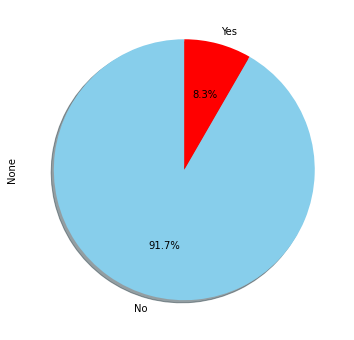

In [ ]:
tele_df[tele_df['Account length']<=9].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [ ]:
tele_df[(tele_df['Account length']<=99) & (tele_df['Account length']>=10)].loc[:,['Churn']].value_counts()

Churn
False    1378
True      225
dtype: int64

In [ ]:
tele_df[(tele_df['Account length']<=99) & (tele_df['Account length']>=10)].shape

(1603, 20)

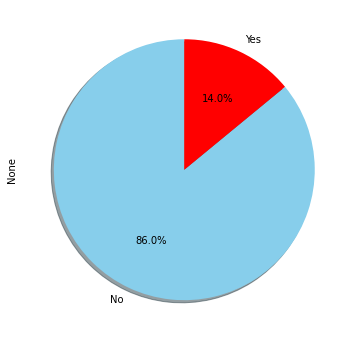

In [ ]:
tele_df[(tele_df['Account length']<=99) & (tele_df['Account length']>=10)].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


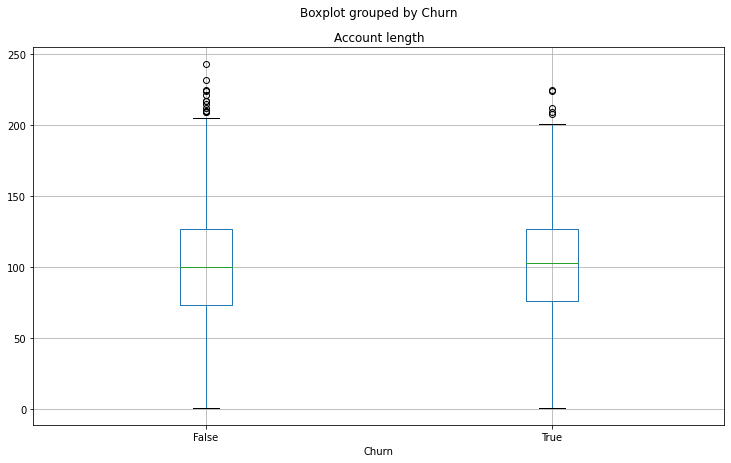

In [ ]:
# Box Plot for Account Length attribute 
tele_df.boxplot(column='Account length',by='Churn')

In [ ]:
#churn plot area wise
print(tele_df['Area code'].value_counts())
print(" ")
print(tele_df.groupby(['Area code'])['Churn'].value_counts())
print(" ")
print(print(tele_df.groupby('Area code')['Churn'].mean()))

415    1655
510     840
408     838
Name: Area code, dtype: int64
 
Area code  Churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: Churn, dtype: int64
 
Area code
408    0.145585
415    0.142598
510    0.148810
Name: Churn, dtype: float64
None


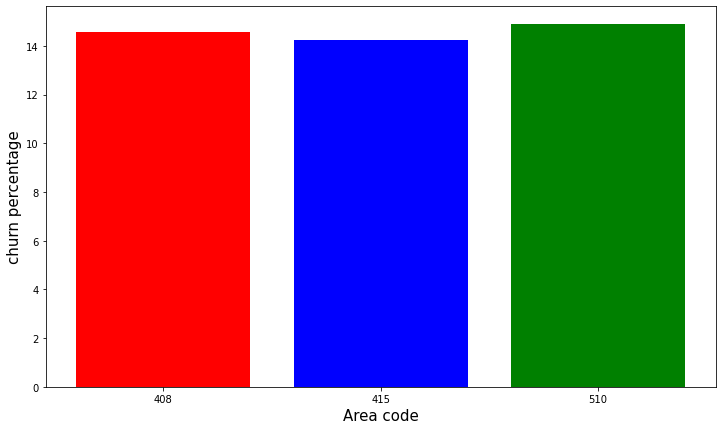

In [ ]:
#plot for area code
a1= list(['408','415' , '510'])
b1= tele_df.groupby('Area code')['Churn'].mean()*100
plt.bar(a1,b1, color=['r','b','g'])

plt.rcParams['figure.figsize'] = (8, 5)


plt.xlabel('Area code', fontsize = 15)
plt.ylabel('churn percentage', fontsize = 15)
plt.show()

In [ ]:
print(tele_df['International plan'].value_counts())
print(" ")
print(tele_df.groupby('International plan')['Churn'].value_counts())
print(" ")
print(" ")
print(tele_df.groupby('International plan')['Churn'].mean())
print(" ")
print(tele_df.groupby(['International plan'])['Total intl charge'].mean())
print(" ")
print(tele_df.groupby(['Churn','International plan'])['Total intl charge'].mean())

No     3010
Yes     323
Name: International plan, dtype: int64
 
International plan  Churn
No                  False    2664
                    True      346
Yes                 False     186
                    True      137
Name: Churn, dtype: int64
 
 
International plan
No     0.114950
Yes    0.424149
Name: Churn, dtype: float64
 
International plan
No     2.753279
Yes    2.869907
Name: Total intl charge, dtype: float64
 
Churn  International plan
False  No                    2.750586
       Yes                   2.640538
True   No                    2.774017
       Yes                   3.181314
Name: Total intl charge, dtype: float64


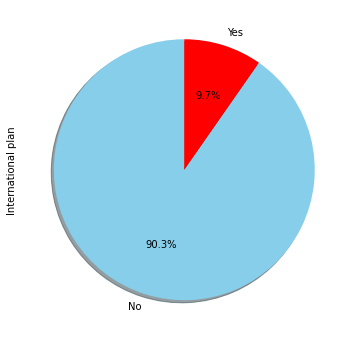

In [ ]:
tele_df['International plan'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [ ]:
#table diffrent column of the table in term of churn rate
i1 = tele_df['International plan'].unique()
i2 = tele_df.groupby('International plan')['Churn'].mean()*100
i3 = tele_df.groupby(['International plan'])['Total intl charge'].mean()
i4 = tele_df.groupby(["Churn"])['Total intl minutes'].mean()

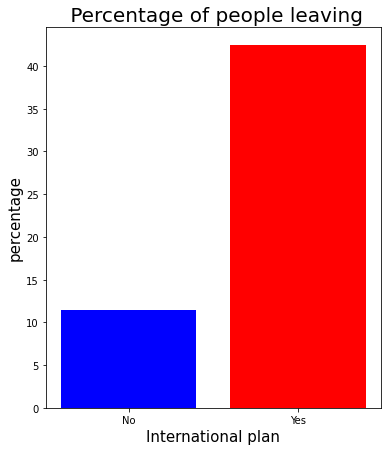

In [ ]:
#percentage of people leaving the international plane
plt.rcParams['figure.figsize'] = (6, 7)

plt.bar(i1,i2 , color=['b','r'])

plt.title(" Percentage of people leaving", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

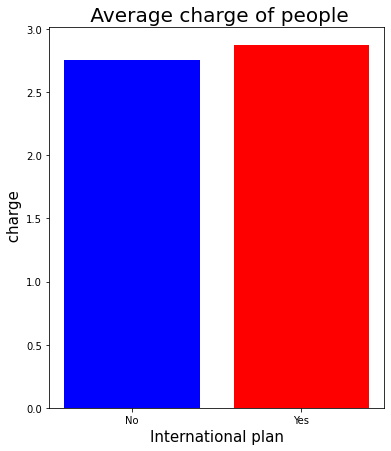

In [ ]:
# plot the avg charge f people
plt.rcParams['figure.figsize'] = (6, 7)

plt.bar(i1,i3, color=['b','r'])
plt.title(" Average charge of people", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel(' charge', fontsize = 15)
plt.show()

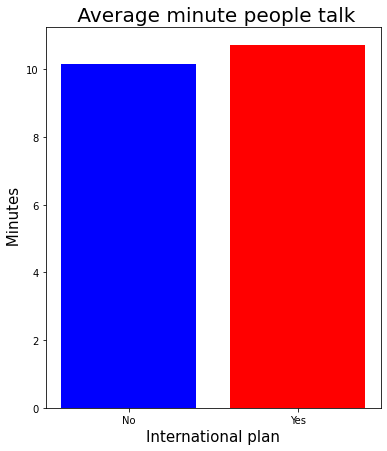

In [ ]:
#plot for international plane
plt.rcParams['figure.figsize'] = (6, 7)

plt.bar(i1,i4, color=['b','r'])
plt.title(" Average minute people talk", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel(' Minutes', fontsize = 15)
plt.show()

In [ ]:
tele_df['Number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: Number vmail messages, dtype: int64

In [ ]:
#table for voice mail
print(tele_df.groupby(['Churn'])['Number vmail messages'].mean())

Churn
False    8.604561
True     5.115942
Name: Number vmail messages, dtype: float64


In [ ]:
print(tele_df.groupby('Voice mail plan')['Number vmail messages'].mean())

Voice mail plan
No      0.000000
Yes    29.277657
Name: Number vmail messages, dtype: float64


In [ ]:
#table for the voice mail plan
print(tele_df['Voice mail plan'].value_counts())
print(" ")
print(tele_df.groupby('Voice mail plan')['Churn'].value_counts())
print(" ")
print(tele_df.groupby('Voice mail plan')['Churn'].mean())
print(" ")
print(" ")

No     2411
Yes     922
Name: Voice mail plan, dtype: int64
 
Voice mail plan  Churn
No               False    2008
                 True      403
Yes              False     842
                 True       80
Name: Churn, dtype: int64
 
Voice mail plan
No     0.167151
Yes    0.086768
Name: Churn, dtype: float64
 
 


In [ ]:
# table total day call
print(tele_df.groupby(["Churn"])['Total day calls'].mean())
print(" ")
print(tele_df.groupby(["Churn"])['Total day minutes'].mean())
print(" ")
print(tele_df.groupby(["Churn"])['Total day charge'].mean())

# 18% more min    18% more charge    no insight

Churn
False    100.283158
True     101.335404
Name: Total day calls, dtype: float64
 
Churn
False    175.175754
True     206.914079
Name: Total day minutes, dtype: float64
 
Churn
False    29.780421
True     35.175921
Name: Total day charge, dtype: float64


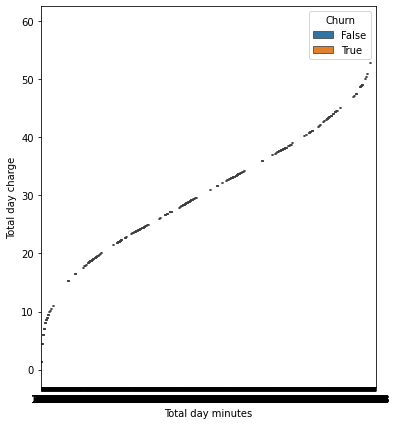

In [ ]:
#scatter plot for total day per minute
scatt = sns.boxplot(x="Total day minutes", y="Total day charge", hue="Churn", data=tele_df)

In [ ]:
#print the table in term of different variable
print(tele_df.groupby(["Churn"])['Total eve calls'].mean())
print(" ")
print(tele_df.groupby(["Churn"])['Total eve minutes'].mean())
print(" ")
print(tele_df.groupby(["Churn"])['Total eve charge'].mean())

Churn
False    100.038596
True     100.561077
Name: Total eve calls, dtype: float64
 
Churn
False    199.043298
True     212.410145
Name: Total eve minutes, dtype: float64
 
Churn
False    16.918909
True     18.054969
Name: Total eve charge, dtype: float64


In [ ]:
# Import pandas library 
import pandas as pd 

# initialize list of lists 
data1 = [['Total day minutes',175.17 , 206.91], ['Total day charge',29.78, 35.17]] 

#7.012,6.12,6.86

# Create the pandas DataFrame 
minutes_code1 = pd.DataFrame(data1, columns = ['day', 'dont churn',' churn']) 

# print dataframe. 
minutes_code1

,day,dont churn,churn
0,Total day minutes,175.17,206.91
1,Total day charge,29.78,35.17


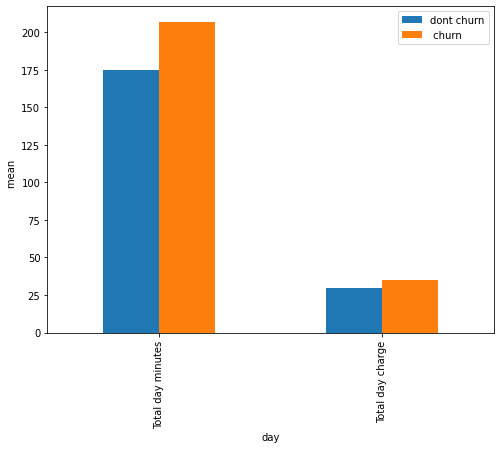

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)


minutes_code1.plot(kind='bar', x='day',ylabel='mean  ')

In [ ]:
# Import pandas library 
import pandas as pd 

# initialize list of lists 
data2 = [ ['Total eve minutes',199.04, 212.41], ['Total night minutes',200.13,205.23]] 

#7.012,6.12,6.86

# Create the pandas DataFrame 
minutes_code2 = pd.DataFrame(data2, columns = ['minutes', 'dont churn',' churn']) 

# print dataframe. 
minutes_code2

,minutes,dont churn,churn
0,Total eve minutes,199.04,212.41
1,Total night minutes,200.13,205.23


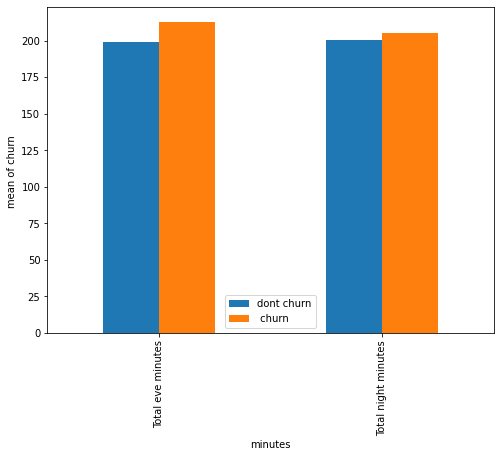

In [ ]:
plt.rcParams['figure.figsize'] = (8,6)


minutes_code2.plot(kind='bar', x='minutes',xlabel='minutes',ylabel='mean of churn ')

In [ ]:
# Import pandas library 
import pandas as pd 

# initialize list of lists 
data3 = [ ['Total eve charge',16.91, 18.05], ['Total night charge',9,9.23]] 

#7.012,6.12,6.86

# Create the pandas DataFrame 
minutes_code3 = pd.DataFrame(data3, columns = ['charge', 'dont churn',' churn']) 

# print dataframe. 
minutes_code3

,charge,dont churn,churn
0,Total eve charge,16.91,18.05
1,Total night charge,9.00,9.23


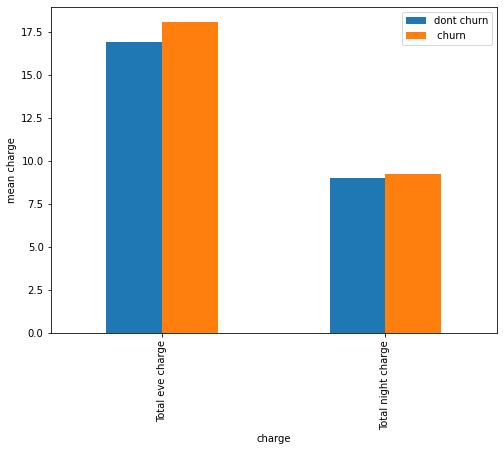

In [ ]:
#plot for evening vs night charge
plt.rcParams['figure.figsize'] = (8,6)


minutes_code3.plot(kind='bar', x='charge',ylabel='mean charge')

In [ ]:
tele_df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [ ]:
#table for the customer service call 
tele_df.groupby(['Customer service calls'])['Churn'].mean()

Customer service calls
0    0.131994
1    0.103302
2    0.114625
3    0.102564
4    0.457831
5    0.606061
6    0.636364
7    0.555556
8    0.500000
9    1.000000
Name: Churn, dtype: float64

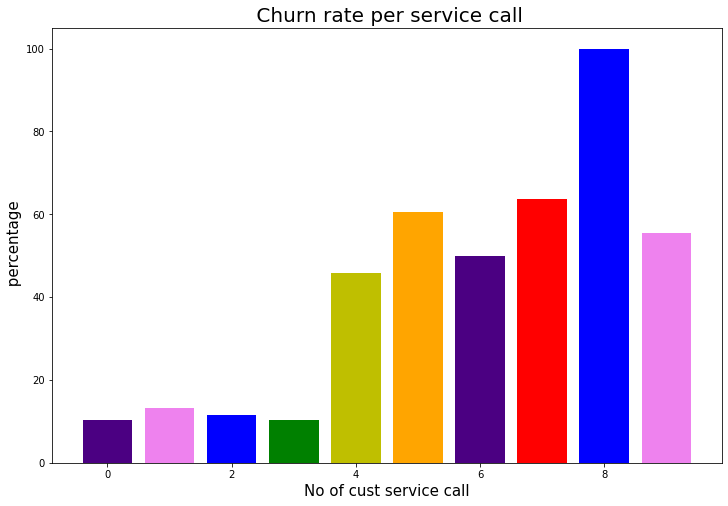

In [ ]:
#plot for churn rate per service call
plt.rcParams['figure.figsize'] = (12, 8)


s1=list(tele_df['Customer service calls'].unique())
s2=list(tele_df.groupby(['Customer service calls'])['Churn'].mean()*100)
plt.bar(s1,s2, color = ['violet','indigo','b','g','y','orange','r'])


plt.title(" Churn rate per service call", fontsize = 20)
plt.xlabel('No of cust service call', fontsize = 15)
plt.ylabel(' percentage', fontsize = 15)
plt.show()

In [ ]:
#plot with numerical feature
numeric_features= tele_df.describe().columns
numeric_features

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

UNIVARIENT ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

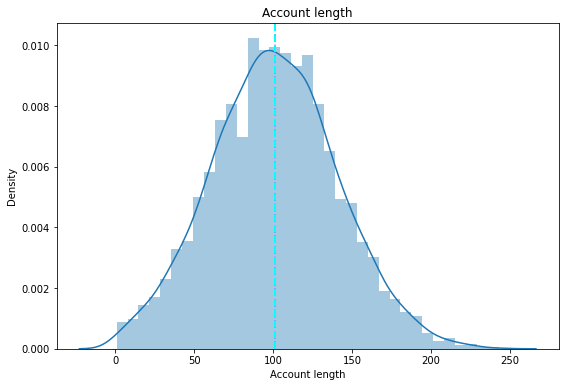

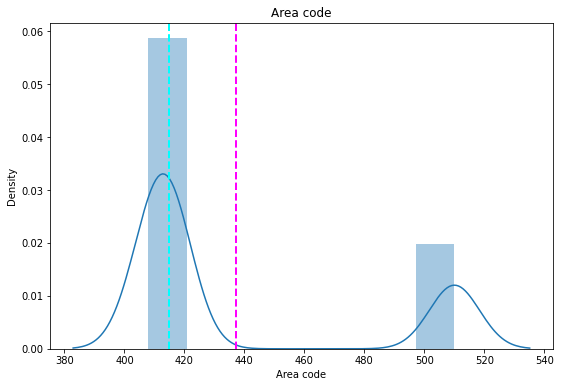

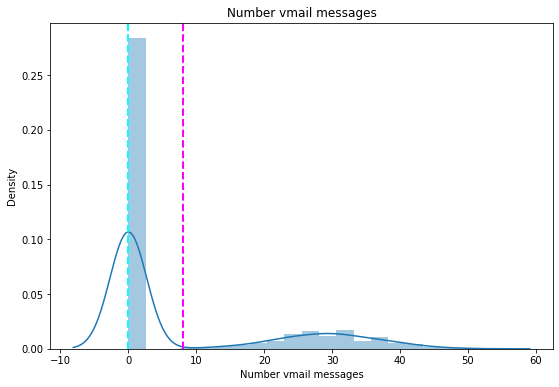

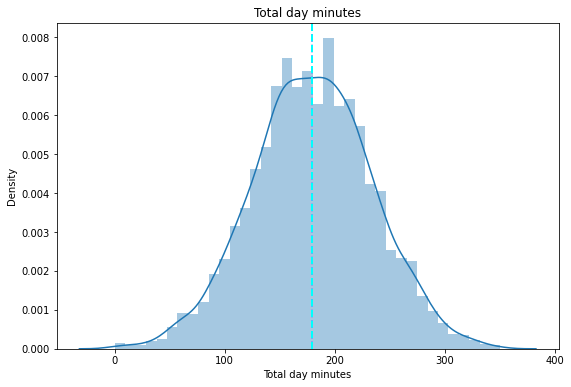

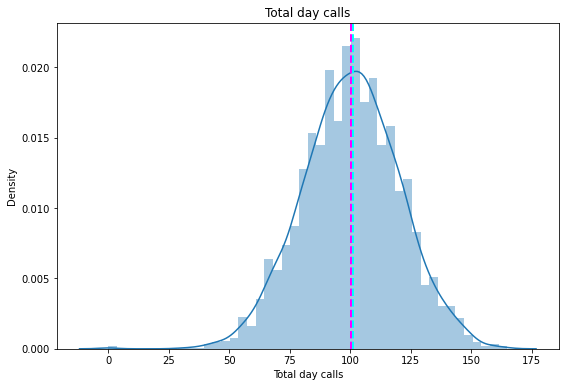

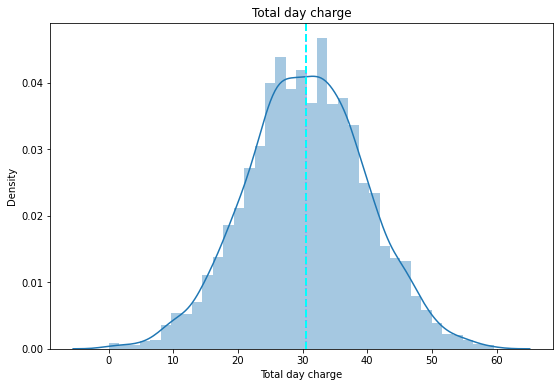

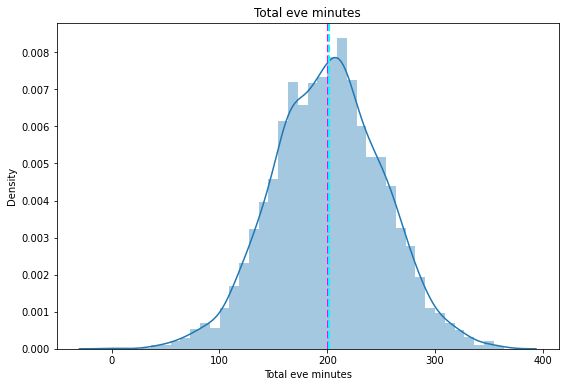

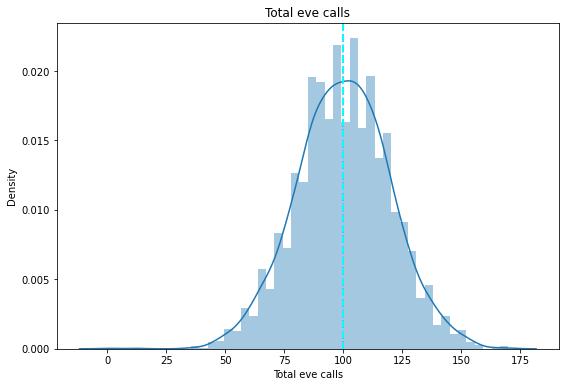

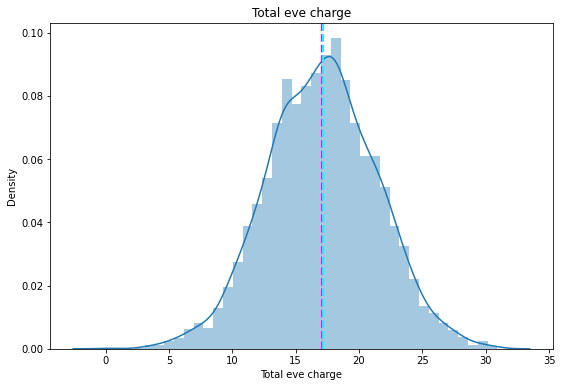

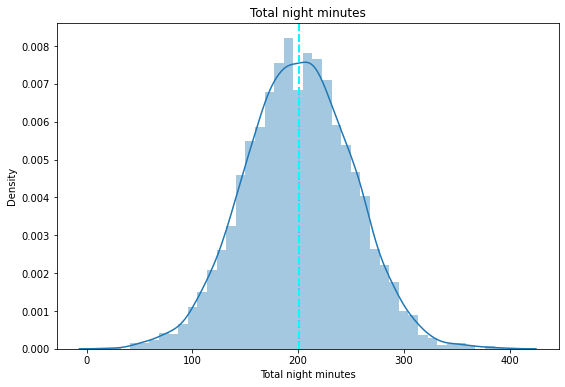

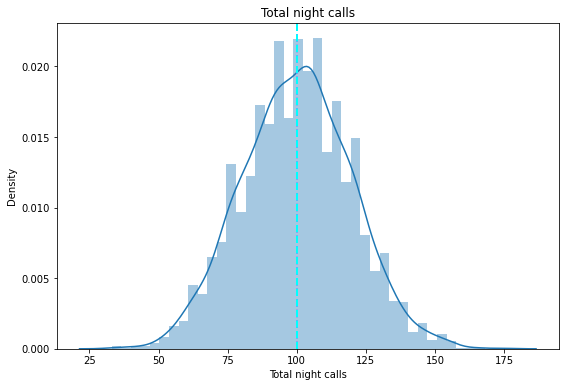

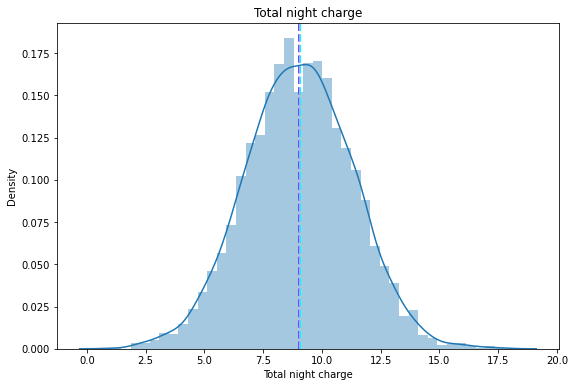

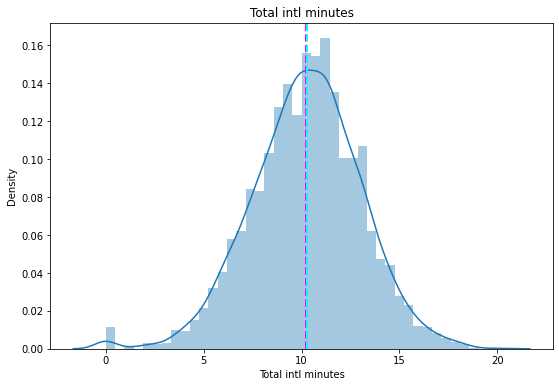

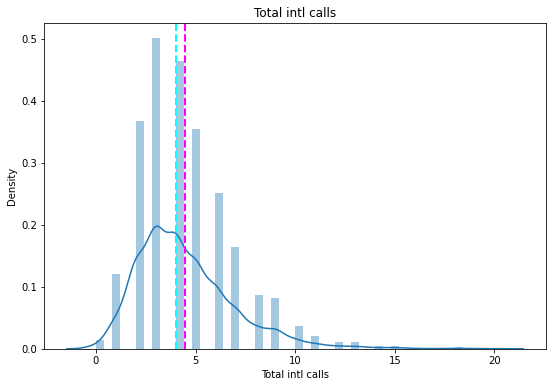

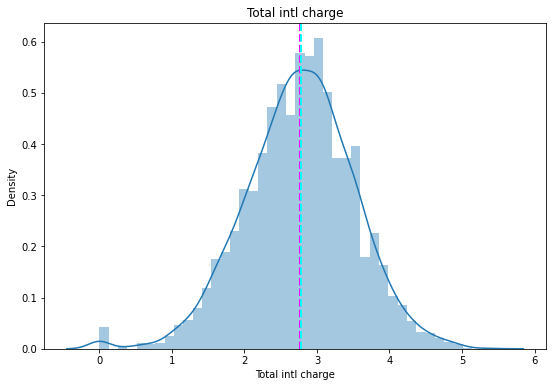

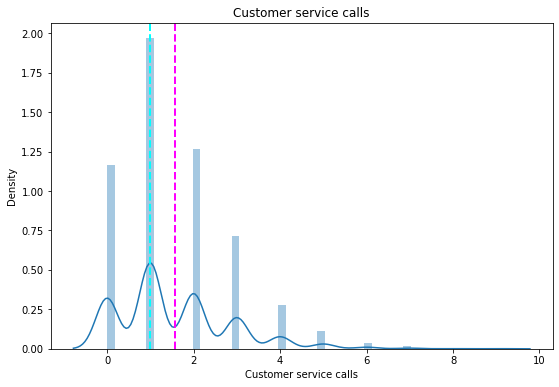

In [ ]:
#plot a bar plot for each numerical feature count with Dist Plot
for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (tele_df[col])
  sns.boxplot(tele_df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

BIVARIENT ANALYSIS

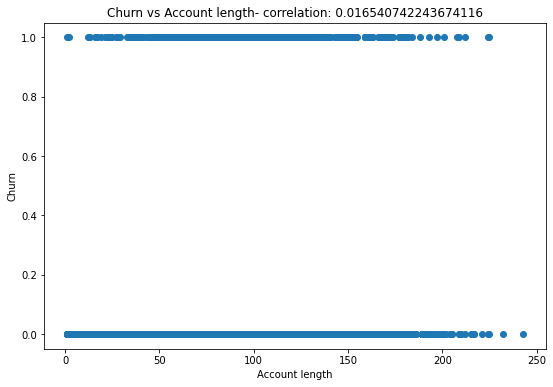

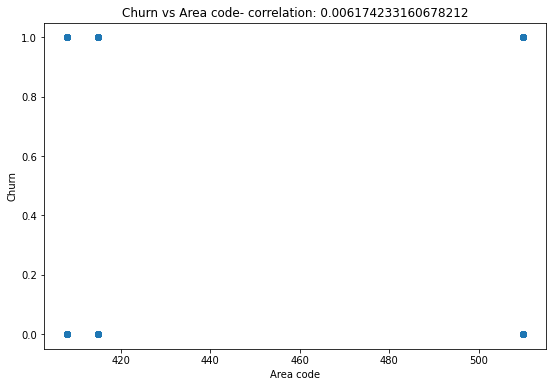

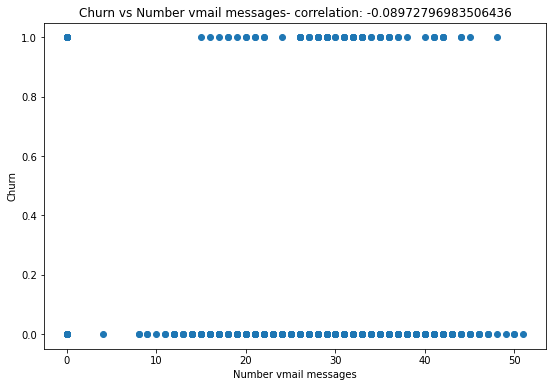

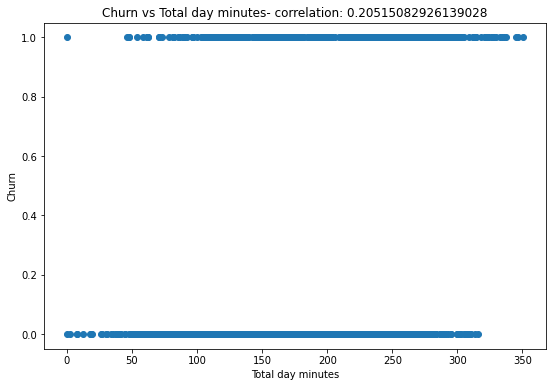

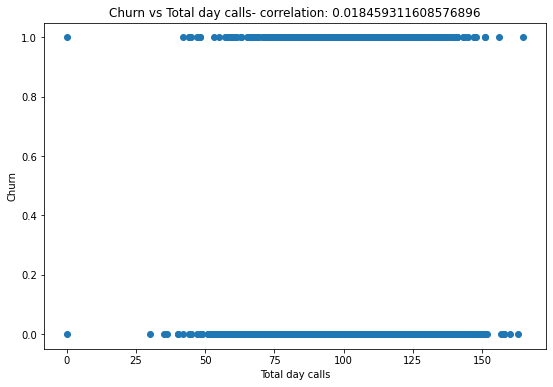

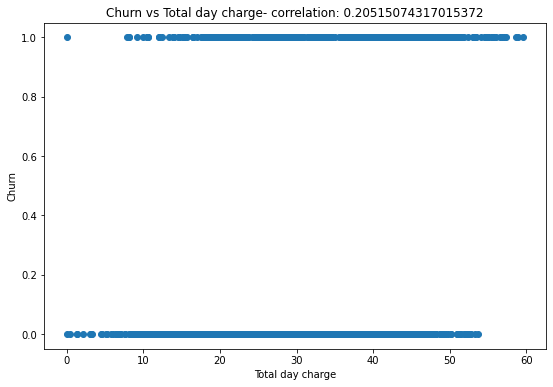

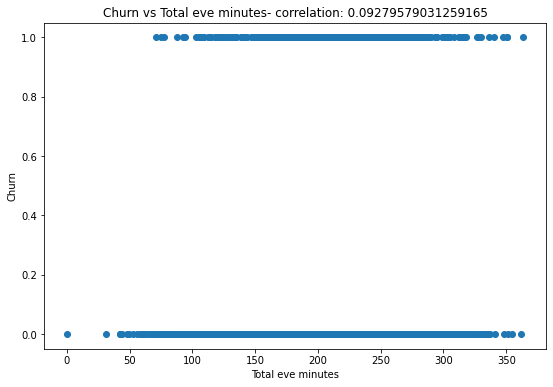

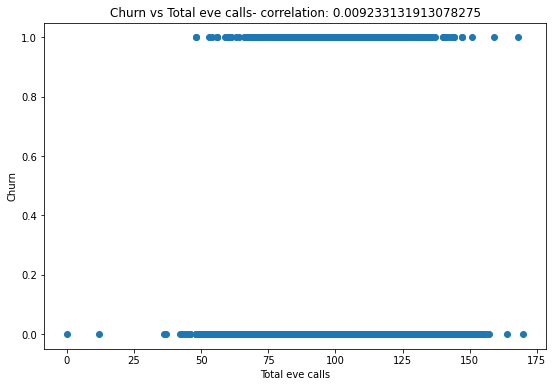

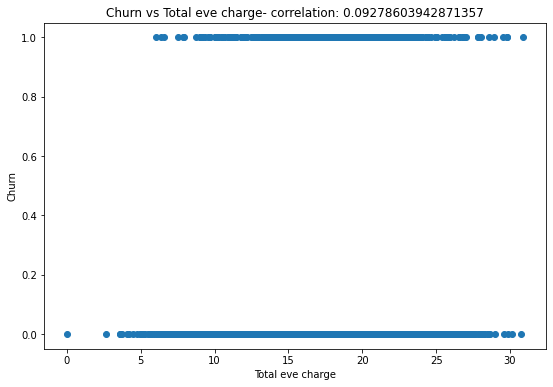

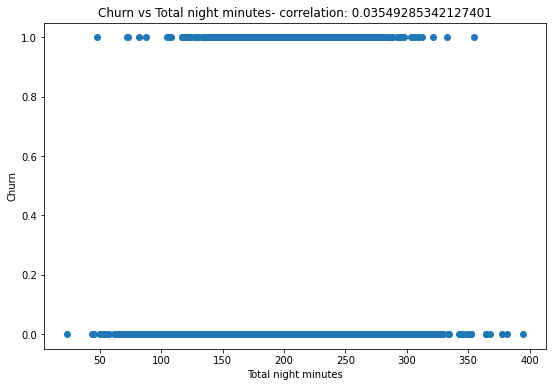

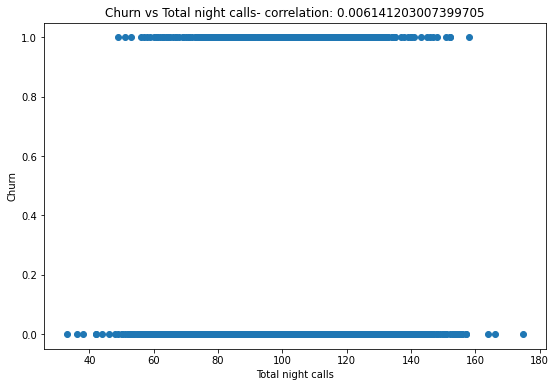

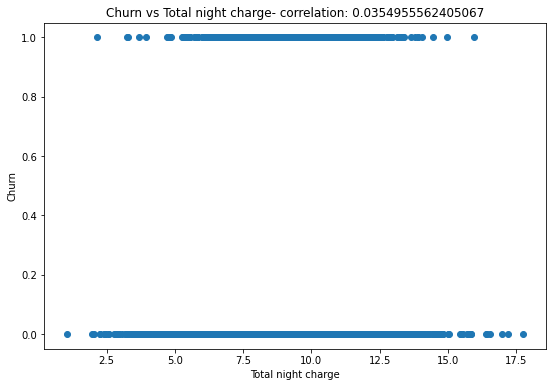

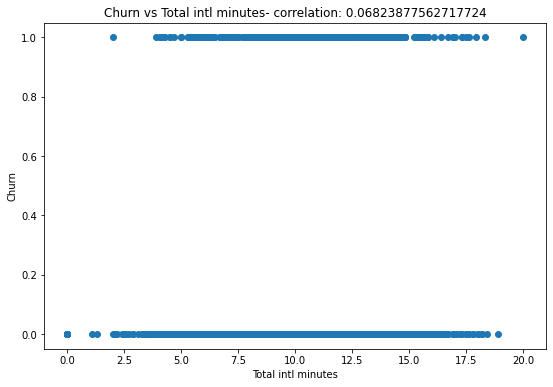

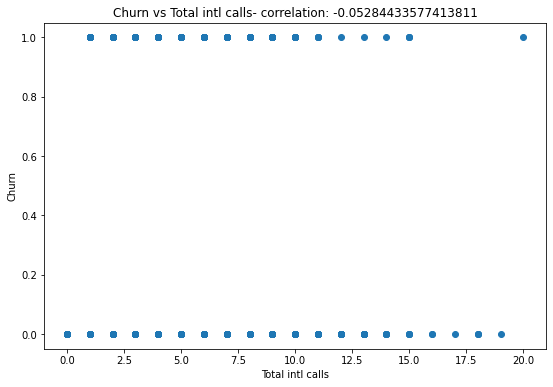

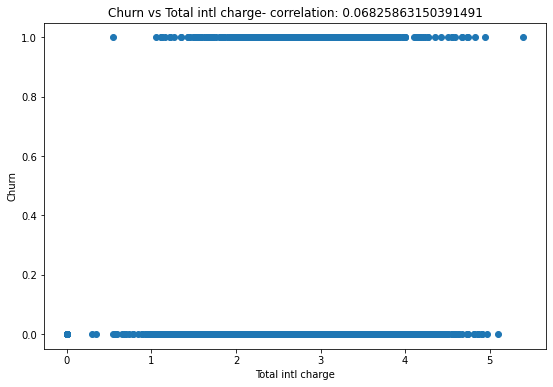

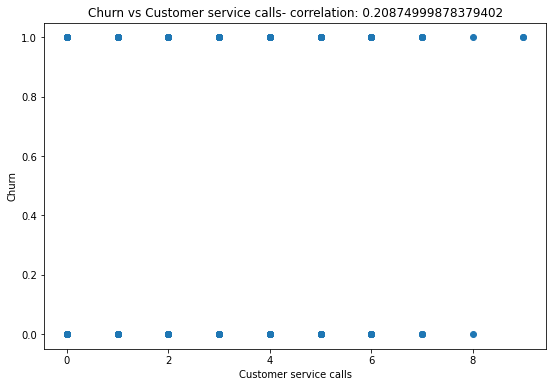

In [ ]:
#loop for features plot
for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=tele_df[col]
  label=tele_df['Churn']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Churn')
  ax.set_title('Churn vs ' +col +'- correlation: '+ str(correlation))
  #z=np.polyfit(dataset[col], dataset['Modified_Churn'], 1)
  #y_hat = np.poly1d(z)(dataset[col])

  #plt.plot(dataset[col], y_hat, "r--", lw=1)